In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1 Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки. 
data = pd.read_csv("museum_visitors.csv")
print(data.head)

<bound method NDFrame.head of           Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0   2014-01-01        24778              4486                     1581   
1   2014-02-01        18976              4172                     1785   
2   2014-03-01        25231              7082                     3229   
3   2014-04-01        26989              6756                     2129   
4   2014-05-01        36883             10858                     3676   
5   2014-06-01        29487              5751                     2121   
6   2014-07-01        32378              5406                     2239   
7   2014-08-01        37680              8619                     1769   
8   2014-09-01        28473             61192                     1073   
9   2014-10-01        27995              6488                     1979   
10  2014-11-01        25691              4189                     2404   
11  2014-12-01        18754              4339                     1319   
12  2015

In [4]:
#2 Вивести перші 5 рядків датасету. 
data.head(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [7]:
#3 Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків). 
data_types = data.dtypes
print("Типи даних:")
print(data.dtypes)

shape = data.shape
print("\nРозмір таблиці")
print(f"Кількість рядків: {shape[0]}")
print(f"Кількість стовпців: {shape[1]}")

missing_values = data.isnull().sum()
print("\nКількість пропусків у кожній колонці")
print(missing_values)



Типи даних:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

Розмір таблиці
Кількість рядків: 59
Кількість стовпців: 5

Кількість пропусків у кожній колонці
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [9]:
#4 Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів). 
duplicates = data[data.duplicated()]
print("Знайдено дублікатів:", len(duplicates))

Знайдено дублікатів: 0


In [11]:
#5 Про які роки містить інформацію датасет. 
years = data["Date"].str.split("-").str[0].unique()
print("роки для яких є інформація у датасеті:")
for year in years:
    print(year)

роки для яких є інформація у датасеті:
2014
2015
2016
2017
2018


In [12]:
#6 Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center). 
new_column_names = {
    "Date": 'date',
    "Avila Adobe": "avila_adobe",
    "Firehouse Museum": "firehouse_museum",
    "Chinese American Museum": "chinese_american_museum",
    "America Tropical Interpretive Center": "america_tropical_interpretive_center"
}
data.rename(columns=new_column_names, inplace=True)
print(data.head())

         date  avila_adobe  firehouse_museum  chinese_american_museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   america_tropical_interpretive_center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [13]:
#7 Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.
average_visitors = round(data.drop(columns=["date"]).mean())
print("середня кількість відвідувачів для кожного музею протягом всього періоду")
print(average_visitors)

середня кількість відвідувачів для кожного музею протягом всього періоду
avila_adobe                             24062.0
firehouse_museum                         6473.0
chinese_american_museum                  2721.0
america_tropical_interpretive_center     7107.0
dtype: float64


In [14]:
#8 Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік 
data_2018 = data[data["date"].str.startswith("2018")]

min_visitors_2018 = data_2018.drop(columns=["date"]).min()
max_visitors_2018 = data_2018.drop(columns=["date"]).max()

print("мінімальна кількість відвідувачів для кожного музею за 2018 рік")
print(min_visitors_2018)
print("максимальна кількість відвідувачів для кожного музею за 2018 рік" )
print(max_visitors_2018)

мінімальна кількість відвідувачів для кожного музею за 2018 рік
avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64
максимальна кількість відвідувачів для кожного музею за 2018 рік
avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


In [35]:
#9 Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри). 
data["date"] = pd.to_datetime(data["date"])
data["Month"] = data["date"].dt.month
data_2015 = data[data['date'].dt.year == 2015]
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
max = data_2015.groupby(data_2015["date"].dt.month)[museum].sum().idxmax()
min = data_2015.groupby(data_2015["date"].dt.month)[museum].sum().idxmin()
print("Місяць з найвищою загальною кількістю відвідувачів у 2015 році: ", month_names[max])
print("Місяць з найнижчою загальною кількістю відвідувачів у 2015 році: ", month_names[min])

Місяць з найвищою загальною кількістю відвідувачів у 2015 році:  May
Місяць з найнижчою загальною кількістю відвідувачів у 2015 році:  February


In [41]:
#10 Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року
summer_months = [6, 7, 8] 
winter_months = [12, 1, 2]  
summer_vis = data_2018[data_2018['date'].dt.month.isin(summer_months)]["avila_adobe"].sum()
winter_vis = data_2018[data_2018['date'].dt.month.isin(winter_months)]["avila_adobe"].sum()
print("Кількістьсть відвідувачів музею 'Avila Adobe' у літні місяці:", summer_vis)
print("Кількість відвідувачів музею 'Avila Adobe' у зимові місяці:", winter_vis)

Кількістьсть відвідувачів музею 'Avila Adobe' у літні місяці: 66122
Кількість відвідувачів музею 'Avila Adobe' у зимові місяці: 30983


In [20]:
#11 Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році
data_2016 = data[data["date"].str.startswith("2016")]
visitors_columns = ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]
visitors_data = data_2016[visitors_columns]
correlation_matrix = visitors_data.corr()
print("кореляцію між кількістю відвідувачів у музеях  та датами у 2016 році:")
print(correlation_matrix)

кореляцію між кількістю відвідувачів у музеях  та датами у 2016 році:
                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_american_

<function matplotlib.pyplot.show(close=None, block=None)>

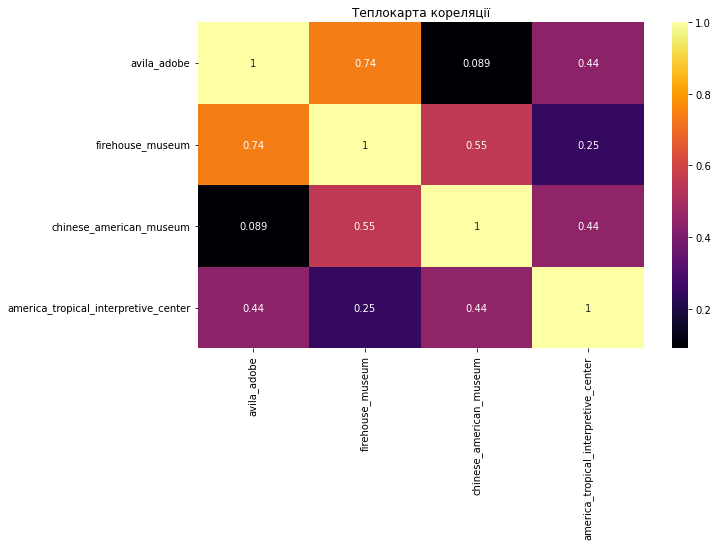

In [22]:
#12 Побудувати теплокарту кореляції для попереднього завдання. 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="inferno")
plt.title("Теплокарта кореляції")
plt.show

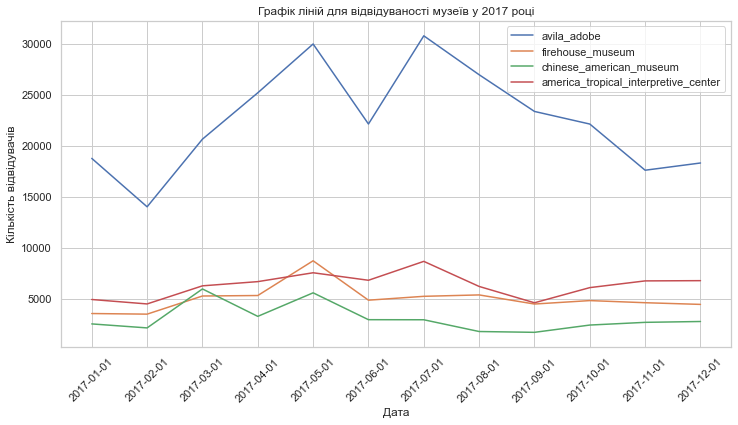

In [25]:
#13 Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.
data_2017 = data[data["date"].str.startswith("2017")]
sns.set(style="whitegrid")
visitors_columns = ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]

plt.figure(figsize=(12,6))
for museum in visitors_columns:
    sns.lineplot(data=data_2017, x="date", y=data_2017[museum], label=museum)
    
plt.title("Графік ліній для відвідуваності музеїв у 2017 році")
plt.xlabel("Дата")
plt.ylabel("Кількість відвідувачів")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

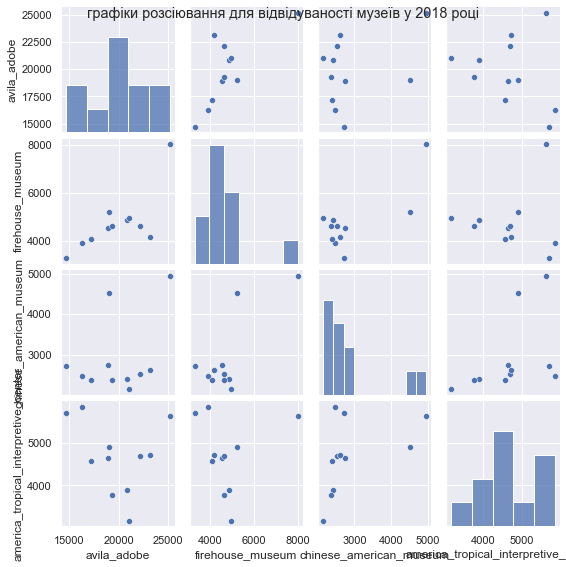

In [27]:
#14 Побудувати графіки розсіювання для кожного музею за 2018 рік 
sns.set(style="darkgrid")
visitors_columns = ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]
sns.pairplot(data=data_2018, vars=visitors_columns, height=2)
plt.suptitle("графіки розсіювання для відвідуваності музеїв у 2018 році")
plt.show

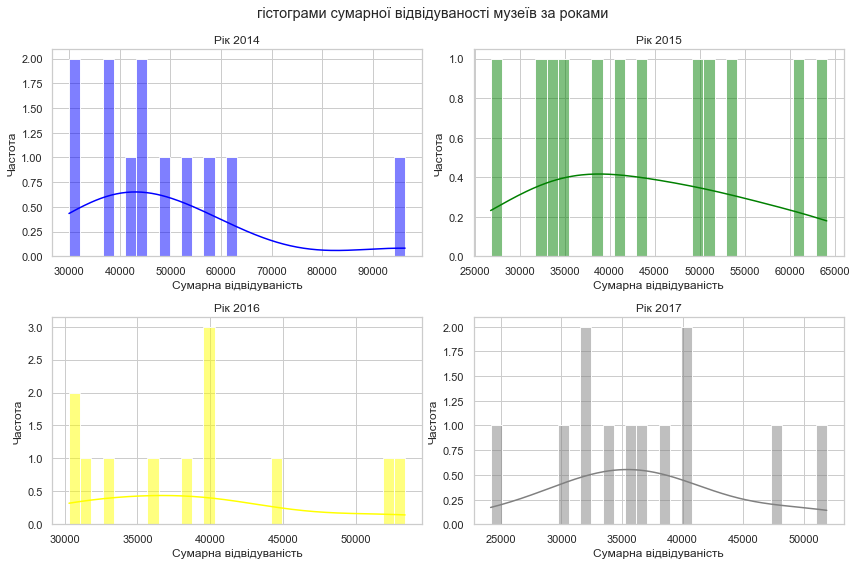

In [33]:
#15 Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.
sns.set(style="whitegrid")
visitors_columns = ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]
data_2014 = data[data["date"].str.startswith("2014")]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("гістограми сумарної відвідуваності музеїв за роками")
colors = ["blue", "green", "yellow", "gray"]

for i,data_year in enumerate([data_2014, data_2015, data_2016, data_2017]):
    summed_visitors = data_year[visitors_columns].sum(axis=1)
    ax = axes[i // 2, i % 2]
    sns.histplot(data=summed_visitors, bins=30, kde=True, ax=ax, color=colors[i])
    ax.set_title(f"Рік {i + 2014}")
    ax.set_xlabel("Сумарна відвідуваність")
    ax.set_ylabel("Частота")

plt.tight_layout()
plt.show()

#ВИСНОВОК : аналіз цих даних надав можливість зрозуміти основні характеристики відвідуваності музеїв протягом певного періоду, виявити варіації у часі та з'ясувати, які музеї можуть бути популярнішими в певний період року.